# Giving perturbation at p array

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfinv
from scipy.stats import cauchy
import matplotlib as mpl

In [2]:
Quantile_Lorentzian = lambda x,d,N : np.array([d*np.tan(np.pi/2 * (2*i - (N + 1))/(N+1)) + x for i in range(1,N+1)])
Quantile_Normal = lambda mu,sigma,N : np.array([mu +sigma*(2**0.5)*erfinv((2*i - N - 1)/(N+1)) for i in range(1,N+1)])

In [3]:
Q_L = lambda mu,d,p: d*np.tan(np.pi/2 * (2*p - 1)) + mu
Q_L_ALL = lambda mu,d,N:Q_L(mu,d,np.random.rand(N))

In [4]:
N = 500
eps = (1/(N+1))*(1/1000)

In [5]:
Rand_P = lambda N,dinv: np.arange(1,N+1)/(N+1) + (1/(N+1))*(1/dinv) * (np.random.rand(N)-0.5)
None_P = lambda N,dinv: np.arange(1,N+1)/(N+1)

In [6]:
def make_color(N):
    int_ =np.linspace(0.7,1,N)
    color = plt.cm.YlOrRd(int_)
    return color

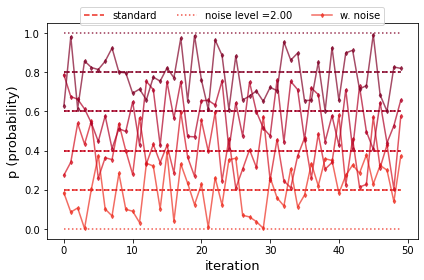

In [7]:
from cProfile import label


N = 4
color = make_color(N)
colorlist = list(map(mpl.colors.to_hex,color))
Noise_inv = (1/(2))
iteration = 50
N_P = np.array([None_P(N,Noise_inv) for _ in range(iteration)]).T
R_P = np.array([Rand_P(N,Noise_inv) for _ in range(iteration)]).T
# plt.plot(N_P.T,'--',label='standard')
for i,(R_,N_) in enumerate(zip(R_P,N_P)):
    if i == 0:
        plt.plot(N_,'--',color=color[i],label='standard')
        plt.plot(N_+(1/(N+1))*0.5*(1/Noise_inv),':',color=color[i],alpha=0.8,label=f'noise level ={1/Noise_inv:.02f}')
        plt.plot(N_-(1/(N+1))*0.5*(1/Noise_inv),':',color=color[i],alpha=0.8)
        
        plt.plot(R_,'d-',color=color[i],label='w. noise',alpha=0.7,markersize=3)
        
    else: 
        plt.plot(N_,'--',color=color[i])
        plt.plot(N_+(1/(N+1))*0.5*(1/Noise_inv),':',color=color[i],alpha=0.8)
        plt.plot(N_-(1/(N+1))*0.5*(1/Noise_inv),':',color=color[i],alpha=0.8)
        
        plt.plot(R_,'d-',color=color[i],alpha=0.7,markersize=3)
        
        
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),ncol=5,fancybox=True)
plt.xlabel("iteration",fontsize=13)
plt.ylabel("p (probability)",fontsize=13)
plt.tight_layout()
plt.savefig(f'Review2/P with noise, noise level = {1/Noise_inv:.02f}.png',dpi=400)

Text(0, 0.5, 'p (probability)')

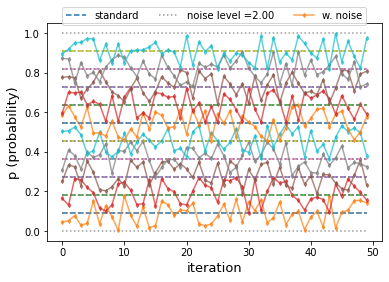

In [127]:
from cProfile import label


N = 10
color = make_color(N)
colorlist = list(map(mpl.colors.to_hex,color))
Noise_inv = (1/(2))
iteration = 50
N_P = np.array([None_P(N,Noise_inv) for _ in range(iteration)]).T
R_P = np.array([Rand_P(N,Noise_inv) for _ in range(iteration)]).T
# plt.plot(N_P.T,'--',label='standard')
for i,(R_,N_) in enumerate(zip(R_P,N_P)):
    if i == 0:
        plt.plot(N_,'--',label='standard')
        plt.plot(N_+(1/(N+1))*0.5*(1/Noise_inv),':',alpha=0.8,color='gray',label=f'noise level ={1/Noise_inv:.02f}')
        plt.plot(N_-(1/(N+1))*0.5*(1/Noise_inv),':',alpha=0.8,color='gray')
        
        plt.plot(R_,'d-',label='w. noise',alpha=0.7,markersize=3)
        
    else: 
        plt.plot(N_,'--')
        plt.plot(N_+(1/(N+1))*0.5*(1/Noise_inv),':',alpha=0.8,color='gray')
        plt.plot(N_-(1/(N+1))*0.5*(1/Noise_inv),':',alpha=0.8,color='gray')
        
        plt.plot(R_,'d-',alpha=0.7,markersize=3)
        
        
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),ncol=5,fancybox=True)
plt.xlabel("iteration",fontsize=13)
plt.ylabel("p (probability)",fontsize=13)


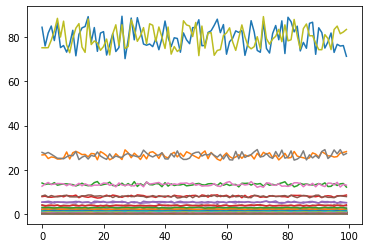

In [57]:
plt.plot(np.diff([Q_L(0,1,Rand_P(500,10)) for _ in range(100)]));

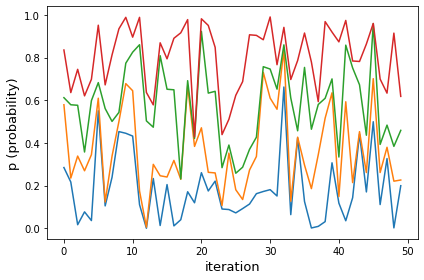

In [161]:

plt.plot([np.sort(np.random.rand(4)) for _ in range(50)]);
plt.xlabel("iteration",fontsize=13)
plt.ylabel("p (probability)",fontsize=13)
plt.tight_layout()
plt.savefig(f'Review2/P with all noise.png',dpi=400)


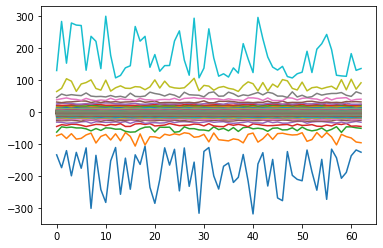

In [146]:
plt.plot(A);
# plt.yscale('log')

In [151]:
N = 500

In [163]:
N,Noise_inv = 500,1
R_P = np.array([Rand_P(N,Noise_inv) for _ in range(63)])
A =np.array([Q_L(0,1,R_) for R_ in R_P])

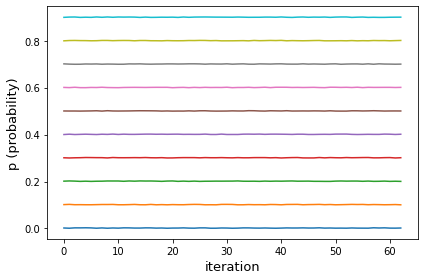

In [175]:
plt.plot(R_P[:,::50]);
plt.xlabel("iteration",fontsize=13)
plt.ylabel("p (probability)",fontsize=13)
plt.tight_layout()
plt.savefig(f'Review2/P little noise.png',dpi=400)

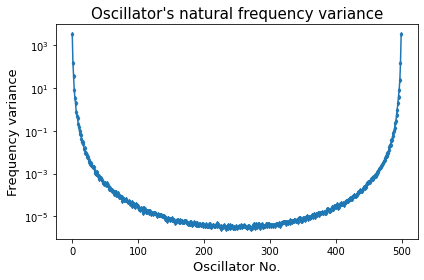

In [176]:
plt.plot(np.var(A,axis=0)[:],'-d',markersize=3)
plt.yscale('log')
plt.xlabel("Oscillator No.",fontsize=13)
plt.ylabel("Frequency variance",fontsize=13)
plt.title("Oscillator's natural frequency variance",fontsize=15)
plt.tight_layout()
plt.savefig('Review2/Scenario 2-1 Oscillator\'s natural frequency variance.png',dpi=400)
# plt.plot(np.var(A,axis=0)[:-10])

In [141]:
int_ =np.linspace(0.05,0.95,500)
color = plt.cm.hsv(int_)

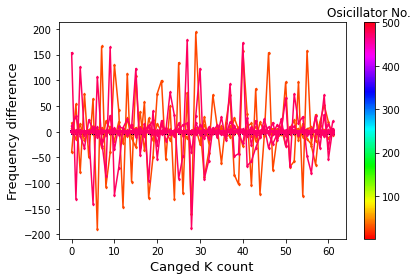

In [153]:
for i,temp  in enumerate((np.diff(A,axis=0).T[::])):
    plt.plot(temp,'-d',color=color[i],markersize=2)

Temp = plt.scatter(np.zeros(N),np.zeros(N),c=np.arange(1,N+1),s=0)
# plt.yscale('log')
plt.xlabel("Canged K count",fontsize=13)
plt.ylabel("Frequency difference",fontsize=13)
# plt.title("Oscillator's frequency variation from mena",fontsize=15)
plt.hsv()
clb = plt.colorbar(Temp)
clb.ax.set_title('Osicillator No.')
plt.tight_layout()

plt.savefig('Review2/Scenario 2-1 Oscillator\'s natural frequency log diff.png',dpi=400)


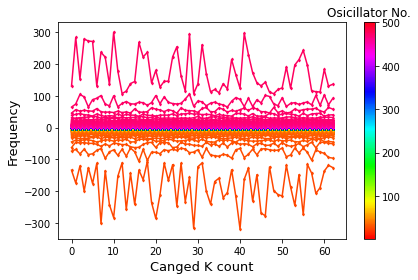

In [156]:
for i,temp  in enumerate(A.T[::]):
    plt.plot(temp,'-d',color=color[i],markersize=2)

Temp = plt.scatter(np.zeros(N),np.zeros(N),c=np.arange(1,N+1),s=0)
# plt.yscale('log')
plt.xlabel("Canged K count",fontsize=13)
plt.ylabel("Frequency",fontsize=13)
# plt.title("Oscillator's frequency variation from mena",fontsize=15)
plt.hsv()
clb = plt.colorbar(Temp)
clb.ax.set_title('Osicillator No.')
plt.tight_layout()

plt.savefig('Review2/Scenario 2-1 Oscillator\'s natural frequency log diff.png',dpi=400)


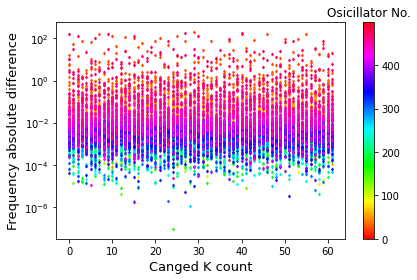

In [154]:
for i,temp  in enumerate((np.diff(A,axis=0).T[::])):
    plt.plot(temp,'d',color=color[i],markersize=2)

Temp = plt.scatter(np.zeros(N),np.zeros(N),c=np.arange(0,N),s=0)
plt.yscale('log')
plt.xlabel("Canged K count",fontsize=13)
plt.ylabel("Frequency absolute difference",fontsize=13)
# plt.title("Oscillator's frequency variation from mena",fontsize=15)
plt.hsv()
clb = plt.colorbar(Temp)
clb.ax.set_title('Osicillator No.')
plt.tight_layout()

# plt.savefig('Review2/Oscillator\'s natural frequency log diff.png',dpi=400)


In [76]:
np.diff([Q_L(0,1,Rand_P(500,10)) for _ in range(100)])

array([[85.3746142 , 24.63817055, 13.96816184, ..., 13.70345643,
        26.418613  , 84.31306913],
       [77.63853418, 25.83044665, 12.46945299, ..., 12.72619571,
        26.19984741, 84.25846769],
       [79.81131275, 26.58041563, 12.31934949, ..., 13.04500975,
        26.33330896, 85.23875504],
       ...,
       [80.62888715, 27.62263844, 12.28622047, ..., 13.00202086,
        28.0860103 , 76.02651866],
       [72.32027432, 27.69370643, 13.14675058, ..., 14.10390101,
        24.00145796, 80.05027027],
       [84.44653765, 27.3400048 , 13.44906021, ..., 12.3613485 ,
        27.22287401, 77.58138531]])

In [84]:
np.diff([Q_L(0,1,Rand_P(5,10)) for _ in range(100)],axis=0).shape

(99, 5)

# Scenario 2
Change P and control
>> oscillator에 주는 변화를 조절할 수 있다고 봄


In [1]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import parmap
import numpy as np
# from tqdm import tqdm_notebook
from tqdm.notebook import tqdm
Rand_P = lambda N,dinv: np.arange(1,N+1)/(N+1) + (1/(N+1))*(1/dinv) * (np.random.rand(N)-0.5)
from TO_sim.To_Draw import *
import os
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print('Error: Creating directory.' + directory)

In [2]:
for Noise in [20,30]:
    for m in [0.95,2,6]:
        N  =  500
        K_start = 0.1
        K_end = 12.5
        dK = 0.2
        Ks = np.arange(K_start,K_end + dK,dK)
        # m = 0.95
        dtheta_init = np.zeros(N)
        t_end = 1000
        Noise_inv = (1/Noise)
        dt = 0.1
        dist = "Quantile Lorentzian" 
        if dist == "Normal":
            theta_init,omega_init, Kc = Normal(N,0,1,seed=0)
        elif dist == "Lorentzian":
            theta_init,omega_init, Kc = Lorentzian(N,0,1,seed=0)
        elif dist == "Quantile Lorentzian":
            theta_init,omega_init, Kc = Quantile_Lorentzian(N,0,1,seed=0)
            
        theta_dic = {}
        dtheta_dic = {}
        rs_dic = {}
        omega_dic = {}
        t_dic = {}

        num = 0
        for K in tqdm(Ks):
            if num == 0:
                omega =  np.sort(Q_L(0,1,Rand_P(N,Noise_inv)))
                theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_init,p_dtheta=dtheta_init,p_omega=omega,distribution="Normal")
            else:
                omega =  np.sort(Q_L(0,1,Rand_P(N,Noise_inv)))
                theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_dic[num-1][-1],p_dtheta=dtheta_dic[num-1][-1],
                                                            p_omega=omega,distribution="Normal")
                # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_dic[num-1][-1],p_dtheta=dtheta_init,p_omega=omega_dic[num-1],distribution="Normal")
            theta_dic[num] = theta_s
            dtheta_dic[num] = dtheta_s
            rs_dic[num] = rs
            omega_dic[num] = omega
            t_dic[num] = t + num*t_end
            num += 1
        theta_r_init,dtheta_r_init = theta_dic[num-1][-1],dtheta_dic[num-1][-1]

        theta_r_dic = {}
        dtheta_r_dic = {}
        rs_r_dic = {}
        omega_r_dic = {}
        t_r_dic = {}
        dKr = -0.2
        Ksr = np.arange(K_end,K_start + dKr,dKr)

        num_r = 0
        for K in tqdm(Ksr):
            if num_r == 0:
                theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_init,p_dtheta=dtheta_r_init,p_omega=omega_init,distribution=dist)
                # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_init,p_dtheta=dtheta_init,p_omega=omega_init,distribution=dist)
            else:
                theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_dic[num_r-1][-1],
                                                            p_dtheta=dtheta_r_dic[num_r-1][-1],p_omega=omega_r_dic[num_r-1],distribution=dist)
                # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_dic[num_r-1][-1],p_dtheta=dtheta_init,p_omega=omega_r_dic[num_r-1],distribution=dist)
            theta_r_dic[num_r] = theta_s
            dtheta_r_dic[num_r] = dtheta_s
            rs_r_dic[num_r] = rs
            omega_r_dic[num_r] = omega
            t_r_dic[num_r] = t + num_r*t_end
            num_r += 1
            
            
        createFolder(f"Review2/Control_P/Sorted/Noise = {Noise}")
        Time_R(Ks,t_dic,rs_dic,t_r_dic,rs_r_dic,dK,dt,t_end,N,m,mean_time=50,save=True,Folder_name=f"Review2/Control_P/Sorted/Noise = {Noise}")


  0%|          | 0/63 [00:00<?, ?it/s]

NameError: name 'Q_L' is not defined

In [ ]:
A = np.array([np.sort(Q_L_ALL(0,1,N)) for _ in Ks])

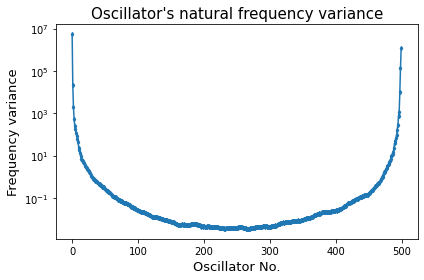

In [ ]:
plt.plot(np.var(A,axis=0)[:],'-d',markersize=3)
plt.yscale('log')
plt.xlabel("Oscillator No.",fontsize=13)
plt.ylabel("Frequency variance",fontsize=13)
plt.title("Oscillator's natural frequency variance",fontsize=15)
plt.tight_layout()
plt.savefig('Review2/Control_P/Oscillator\'s natural frequency variance.png',dpi=400)
# plt.plot(np.var(A,axis=0)[:-10])

In [ ]:
int_ =np.linspace(0.05,0.95,500)
color = plt.cm.hsv(int_)

In [ ]:
np.diff(A,axis=0).shape

(62, 500)

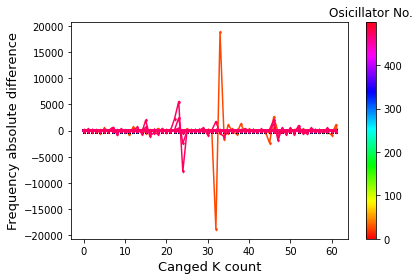

In [ ]:
for i,temp  in enumerate((np.diff(A,axis=0).T[::])):
    plt.plot(temp,'-d',color=color[i],markersize=2)

Temp = plt.scatter(np.zeros(N),np.zeros(N),c=np.arange(0,N),s=0)
# plt.yscale('log')
plt.xlabel("Canged K count",fontsize=13)
plt.ylabel("Frequency absolute difference",fontsize=13)
# plt.title("Oscillator's frequency variation from mena",fontsize=15)
plt.hsv()
clb = plt.colorbar(Temp)
clb.ax.set_title('Osicillator No.')
plt.tight_layout()

# plt.savefig('Review2/Oscillator\'s natural frequency log diff.png',dpi=400)


In [ ]:
for temp  in (A.T-np.mean(A,axis=1))[20:-20:10]:
    plt.plot(temp)